# 0. Libraries.

In [1]:
#Importing Required Libraries
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import cufflinks as cf
from pandas_datareader import data
from pandas.tseries.frequencies import to_offset
import csv
from scipy.optimize import brute
plt.style.use("seaborn")
from matplotlib import pyplot

# 1. Constants.

In [2]:
#training
start='1999-12-31'
end='2022-12-31'

nasdaq_performance_2023=0.1121

# 2. Data 

In [3]:
df_daily = yf.download("^NDX", start = start, end = end)

[*********************100%***********************]  1 of 1 completed


In [4]:
df_daily.tail(2)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-29,10800.799805,10981.059570,10776.620117,10951.049805,10951.049805,4154100000
2022-12-30,10835.589844,10942.900391,10778.639648,10939.759766,10939.759766,3959030000


In [5]:
current_price = df_daily.iloc[-1].Close

## 2.1. Resample Monthly.

In [6]:
df_month = yf.download("^NDX", start = start, end = end, interval="1mo")
df_month = df_month.drop(["High","Low","Volume","Adj Close"],axis=1)

[*********************100%***********************]  1 of 1 completed


In [7]:
df_month["return_jan"] = (df_month.Close-df_month.Open)/df_month.Open
#df_month=df_month.dropna()

In [8]:
df_month_january = df_month[df_month.index.month==1]

In [9]:
df_month_january.index=df_month_january.index.year

In [10]:
df_month_january.rename(columns={"Open":"Open_Jan","Close":"Close_Jan"},inplace=True)

In [11]:
df_month_january.head(5)

,Open_Jan,Close_Jan,return_jan
Date,,,
2000,3755.739990,3570.050049,-0.049442
2001,2341.280029,2593.000000,0.107514
2002,1590.709961,1550.170044,-0.025485
2003,995.640015,983.049988,-0.012645
2004,1474.160034,1493.079956,0.012834


## 2.2. Resample Yearly.

In [12]:
df_yearly = pd.DataFrame()
df_yearly["Open"] = df_month.resample("Y").first().Open
df_yearly["Close"] = df_month.resample("Y").last().Close
#df_yearly.index = df_yearly.index.year
df_yearly["return_Yearly"]=(df_yearly.Close-df_yearly.Open)/df_yearly.Open
#df_yearly.index=df_yearly.year
df_yearly.rename(columns={"Open":"Open_Yearly","Close":"Close_Yearly"},inplace=True)

# 2.3. Time Series Plot

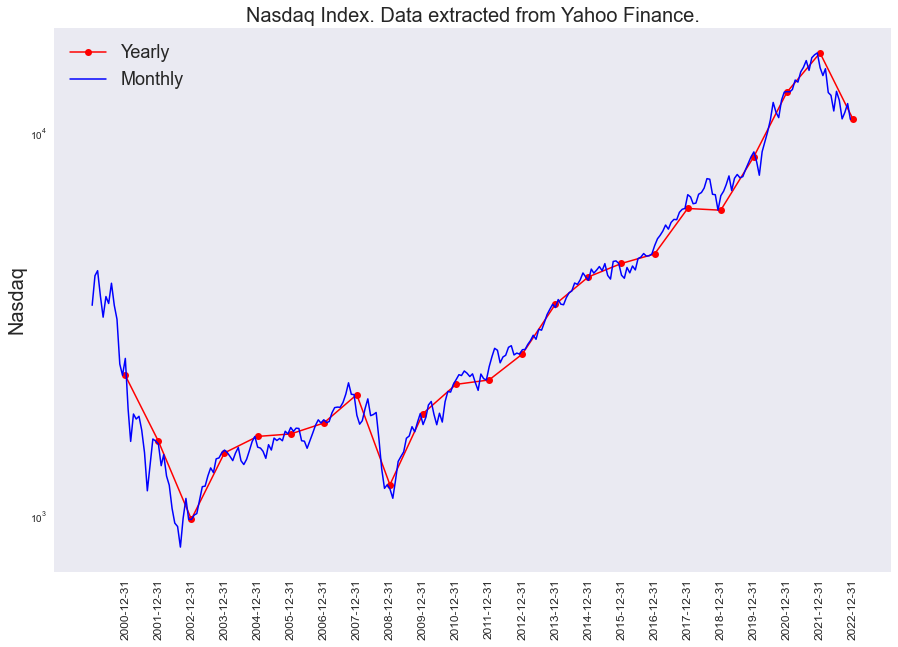

In [13]:
plt.figure(figsize=(15,10))
    
plt.plot(df_yearly.index,df_yearly.Close_Yearly,linewidth=1.5,color="r",label="Yearly",marker="o")

plt.plot(df_month.index,df_month.Close,linewidth=1.5,color="b",label="Monthly")

#plt.axhline(y = 1, color = 'r', linestyle = '--')

plt.title("Nasdaq Index. Data extracted from Yahoo Finance.",fontsize=20)

#plt.xlabel('Dates',fontsize=20)

plt.xticks(df_yearly.index,fontsize=12,rotation=90)

plt.ylabel('Nasdaq',fontsize=20)

pyplot.yscale('log')

plt.legend(fontsize=18,loc='upper left')

plt.grid()

plt.show()

# 2.4. Data Integration

In [14]:
df_yearly.index=df_yearly.index.year

In [15]:
df = df_yearly.join(df_month_january)

In [16]:
df

,Open_Yearly,Close_Yearly,return_Yearly,Open_Jan,Close_Jan,return_jan
Date,,,,,,
2000,3755.739990,2341.699951,-0.376501,3755.739990,3570.050049,-0.049442
2001,2341.280029,1577.050049,-0.326415,2341.280029,2593.000000,0.107514
2002,1590.709961,984.369995,-0.381176,1590.709961,1550.170044,-0.025485
2003,995.640015,1467.920044,0.474348,995.640015,983.049988,-0.012645
2004,1474.160034,1621.119995,0.099691,1474.160034,1493.079956,0.012834
2005,1628.750000,1645.199951,0.010100,1628.750000,1519.630005,-0.066996
2006,1654.390015,1756.900024,0.061962,1654.390015,1710.750000,0.034067
2007,1769.219971,2084.929932,0.178446,1769.219971,1792.280029,0.013034
2008,2085.530029,1211.650024,-0.419021,2085.530029,1841.420044,-0.117049


In [17]:
(df.return_jan>0).sum()

11

In [18]:
(df.return_Yearly>0).sum()

17

# 3. Model

In [19]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [20]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

## 3.1. Model Positive Jan Months

In [21]:
x_train=df[["return_jan"]]
y_train=df.return_Yearly.values

In [22]:
reg = LinearRegression().fit(x_train,y_train)

In [23]:
result = reg.predict([[nasdaq_performance_2023]])

C:\Users\pcalatayud\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



In [24]:
y_pred = reg.predict(x_train)

In [25]:
print(f"For a January pct_change of {nasdaq_performance_2023*100} % it is expected a year returns of: ", result[0]*100 ,"%.")

For a January pct_change of 11.21 % it is expected a year returns of:  25.467405057712078 %.


In [26]:
print("That estimates a nasdaq price of",current_price*(1+result[0]))

That estimates a nasdaq price of 13725.832697477332


Coefficients: 
 [1.49158909]
Mean squared error: 0.08


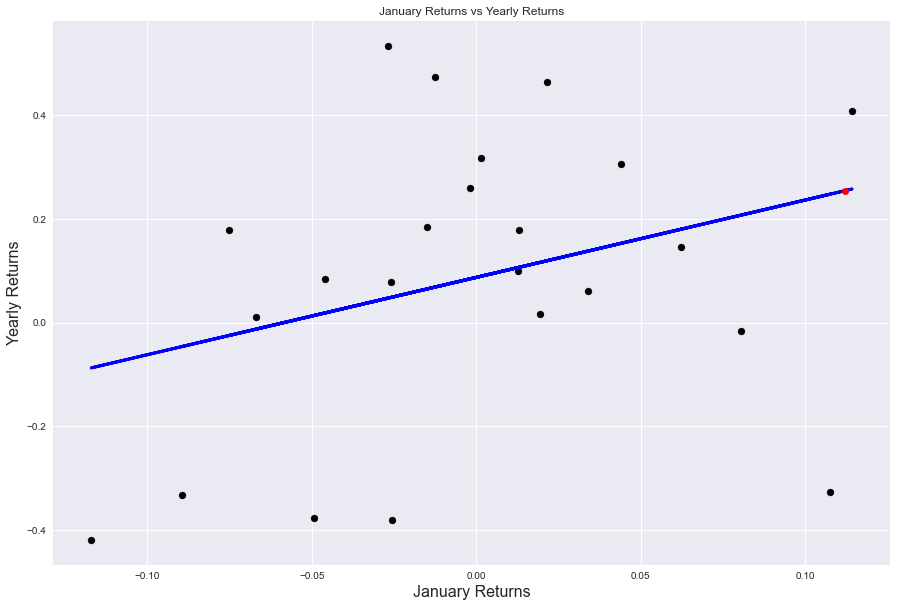

In [27]:
plt.figure(figsize=(15,10))
# The coefficients
print("Coefficients: \n", reg.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(x_train, y_train))
# The coefficient of determination: 1 is perfect prediction
#print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

plt.title("January Returns vs Yearly Returns")
# Plot outputs
plt.scatter(x_train, y_train, color="black")

plt.plot(x_train, y_pred, color="blue", linewidth=3)

plt.plot(nasdaq_performance_2023, result, color="red", marker="o")

plt.xlabel("January Returns",fontsize=16)

plt.ylabel("Yearly Returns",fontsize=16)
#plt.xticks((x_train))
#plt.yticks((y_train))

plt.show()

In [28]:
#INTERESTING CONCLUSIONS

#just one year where january returns where above 0, there was a painful year